In [2]:
import pandas as pd
#from youtube_crawler import *
import json
import sys
import csv
import re
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
import json, time

In [16]:
# Reference: https://stackoverflow.com/a/57076690/15164646
from selenium import webdriver
import json, time 

def get_videos(ticker):
    driver = webdriver.Chrome("/Users/miao/Desktop/chromedriver") #add path to webdriver
    driver.get('https://www.youtube.com/results?search_query={}+stock'.format(ticker))

    youtube_data = []

    # scrolling to the end of the page
    while True:
        # end_result = "No more results" string at the bottom of the page
        # this will be used to break out of the while loop
        end_result = driver.find_element_by_css_selector('#message').is_displayed()
        driver.execute_script("var scrollingElement = (document.scrollingElement || document.body);scrollingElement.scrollTop = scrollingElement.scrollHeight;")
        #print(end_result)

        if end_result == True:
            break

    print('Extracting results for {}. It might take a while...'.format(ticker))

    for result in driver.find_elements_by_css_selector('.text-wrapper.style-scope.ytd-video-renderer'):
        title = result.find_element_by_css_selector('.title-and-badge.style-scope.ytd-video-renderer').text
        link = result.find_element_by_css_selector('.title-and-badge.style-scope.ytd-video-renderer a').get_attribute('href')
        channel_name = result.find_element_by_css_selector('.long-byline').text
        channel_link = result.find_element_by_css_selector('#text > a').get_attribute('href')
        views = result.find_element_by_css_selector('.style-scope ytd-video-meta-block').text.split('\n')[0]

        try:
            time_published = result.find_element_by_css_selector('.style-scope ytd-video-meta-block').text.split('\n')[1]
        except:
            time_published = None

        try:
            snippet = result.find_element_by_css_selector('.metadata-snippet-container').text
        except:
            snippet = None

        try:
            if result.find_element_by_css_selector('#channel-name .ytd-badge-supported-renderer') is not None:
                verified_badge = True
            else:
                verified_badge = False
        except:
            verified_badge = None

        try:
            extensions = result.find_element_by_css_selector('#badges .ytd-badge-supported-renderer').text
        except:
            extensions = None
        #print(verified_badge)
        
        #threshold for views above 1000
        #if "K" in views or "M" in views:
        youtube_data.append({
                'title': title,
                'link': link,
                'channel_name': channel_name, 
                'channel_link': channel_link,
                'views': views,
                'time_published': time_published,
                'snippet': snippet,
                'verified_badge': verified_badge,
                'extensions': extensions,
            })
        
    print("crawled", len(youtube_data), "videos")
    #print(json.dumps(youtube_data, indent=2, ensure_ascii=False))
    driver.quit()
    
    return youtube_data

In [17]:
%%time
video_lst = get_videos('GME')

Extracting results for GME. It might take a while...
crawled 645 videos
CPU times: user 31.7 s, sys: 1.98 s, total: 33.7 s
Wall time: 6min 17s


In [8]:
with open("gme_videos.json", "w") as outfile:
    json.dump(video_lst, outfile)

In [9]:
import os

In [10]:
os.getcwd()

'/Users/miao/Desktop/CA/final proj'

In [21]:
df = {'title':[], 'url': [], 'ticker': [], 'channel_name': [], 'views': [],
      'time_published': [], 'snippet': [], 'channel_link': []}

In [38]:
data = pd.DataFrame(video_lst)[['title', 'link', 'channel_name', 'channel_link', 'views', 'time_published', 'snippet']]

In [39]:
data.head()

,title,link,channel_name,channel_link,views,time_published,snippet
0,GME Stock Dumping Setting Up For Earnings Anno...,https://www.youtube.com/watch?v=QxAURd6O50g,Happy Money,https://www.youtube.com/c/HappyMoneyFinance,989 views,1 day ago,"Thank you for your support. Sub up, Like up, C..."
1,AMC Stock & GME Stock Hedge Funds And Big Bank...,https://www.youtube.com/watch?v=27pvUBtMCeQ,Simulate & Trade,https://www.youtube.com/channel/UCW6xUGOnJ_XOR...,9.8K views,23 hours ago,AMC Stock and GME Stock are the best hedge aga...
2,GME Short Squeeze 3-11-22 | Fox News Highlight...,https://www.youtube.com/watch?v=KMOKJirlL-k,JacksonHunter,https://www.youtube.com/c/JacksonHunter,1.2K views,21 hours ago,"In this video we go over the chart, SPY, Black..."
3,SHOCKING: Jim Cramer TALKS AMC & GME (GameStop...,https://www.youtube.com/watch?v=FAs1vYKXGRc,TickrBox,https://www.youtube.com/c/TickrBox,5.2K views,7 days ago,SHOCKING: Jim Cramer TALKS AMC & GME (GameStop...
4,BREAKING: Jordan Belfort (Wolf of Wall Street)...,https://www.youtube.com/watch?v=6rn2_EoDoXU,TickrBox,https://www.youtube.com/c/TickrBox,642 views,2 hours ago,Join the 100% Winner Community https://www.pat...


In [40]:
data['title'] + data['snippet']

0      GME Stock Dumping Setting Up For Earnings Anno...
1      AMC Stock & GME Stock Hedge Funds And Big Bank...
2      GME Short Squeeze 3-11-22 | Fox News Highlight...
3      SHOCKING: Jim Cramer TALKS AMC & GME (GameStop...
4      BREAKING: Jordan Belfort (Wolf of Wall Street)...
                             ...                        
640    Bitcoin's "Bart Chart" | Benzinga Live 🚨Sal Gi...
641    Ryan Cohen Takes Stake In $BBBY | Benzinga Liv...
642    Ryan Cohen Takes NEW STAKE In Bed Bath & Beyon...
643    GameStop GME - Price Prediction and Technical ...
644    BBBY surges after big stake by Ryan Cohen reve...
Length: 645, dtype: object

In [43]:
def isNaN(num):
    return num != num

In [50]:
data['text'] = data['title'] + data['snippet']

In [51]:
data

,title,link,channel_name,channel_link,views,time_published,snippet,text
0,GME Stock Dumping Setting Up For Earnings Anno...,https://www.youtube.com/watch?v=QxAURd6O50g,Happy Money,https://www.youtube.com/c/HappyMoneyFinance,989 views,1 day ago,"Thank you for your support. Sub up, Like up, C...",GME Stock Dumping Setting Up For Earnings Anno...
1,AMC Stock & GME Stock Hedge Funds And Big Bank...,https://www.youtube.com/watch?v=27pvUBtMCeQ,Simulate & Trade,https://www.youtube.com/channel/UCW6xUGOnJ_XOR...,9.8K views,23 hours ago,AMC Stock and GME Stock are the best hedge aga...,AMC Stock & GME Stock Hedge Funds And Big Bank...
2,GME Short Squeeze 3-11-22 | Fox News Highlight...,https://www.youtube.com/watch?v=KMOKJirlL-k,JacksonHunter,https://www.youtube.com/c/JacksonHunter,1.2K views,21 hours ago,"In this video we go over the chart, SPY, Black...",GME Short Squeeze 3-11-22 | Fox News Highlight...
3,SHOCKING: Jim Cramer TALKS AMC & GME (GameStop...,https://www.youtube.com/watch?v=FAs1vYKXGRc,TickrBox,https://www.youtube.com/c/TickrBox,5.2K views,7 days ago,SHOCKING: Jim Cramer TALKS AMC & GME (GameStop...,SHOCKING: Jim Cramer TALKS AMC & GME (GameStop...
4,BREAKING: Jordan Belfort (Wolf of Wall Street)...,https://www.youtube.com/watch?v=6rn2_EoDoXU,TickrBox,https://www.youtube.com/c/TickrBox,642 views,2 hours ago,Join the 100% Winner Community https://www.pat...,BREAKING: Jordan Belfort (Wolf of Wall Street)...
...,...,...,...,...,...,...,...,...
640,"Bitcoin's ""Bart Chart"" | Benzinga Live 🚨",https://www.youtube.com/watch?v=Gw3JRYRScpA,Benzinga,https://www.youtube.com/c/Benzinga,3.1K views,Streamed 2 days ago,"Sal Gilbertie, CEO of Teucrium Trading Jesse K...","Bitcoin's ""Bart Chart"" | Benzinga Live 🚨Sal Gi..."
641,Ryan Cohen Takes Stake In $BBBY | Benzinga Live 🚨,https://www.youtube.com/watch?v=bcUALXe0Uy4,Benzinga,https://www.youtube.com/c/Benzinga,2.7K views,Streamed 5 days ago,On today's Benzinga Live: -Ryan Cohen Takes Ne...,Ryan Cohen Takes Stake In $BBBY | Benzinga Liv...
642,Ryan Cohen Takes NEW STAKE In Bed Bath & Beyon...,https://www.youtube.com/watch?v=HjRadTv8o6c,Benzinga,https://www.youtube.com/c/Benzinga,6K views,Streamed 5 days ago,Benzinga's Cannabis Capital Conference Kicks o...,Ryan Cohen Takes NEW STAKE In Bed Bath & Beyon...
643,GameStop GME - Price Prediction and Technical ...,https://www.youtube.com/watch?v=uAQ3tYnD2i0,Crypto Boss Andrew,https://www.youtube.com/channel/UCjK59q5KhEW2M...,22 views,2 days ago,Join our CBA telegram chat; https://t.me/+II4n...,GameStop GME - Price Prediction and Technical ...


In [52]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud #just in case, regularly update your lucem_illud with the following code: pip install git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

In [53]:
nlp = spacy.load("en")

In [54]:
type(nlp)

spacy.lang.en.English

In [55]:
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

In [67]:
a = 'ssdfd'
type(a) == str

True

In [72]:
cnt = 0
for i in data['text']:
    cnt+=1
    if (type(i) != str):
        #print(type(i))
        print(i)
        print(cnt)

nan
138
nan
257
nan
351
nan
353
nan
544
nan
584
nan
591


In [101]:
d = data.copy()

In [102]:
d = d.drop([137, 256,350,352,543,583,590])

In [103]:
d[:138]

,title,link,channel_name,channel_link,views,time_published,snippet,text
0,GME Stock Dumping Setting Up For Earnings Anno...,https://www.youtube.com/watch?v=QxAURd6O50g,Happy Money,https://www.youtube.com/c/HappyMoneyFinance,989 views,1 day ago,"Thank you for your support. Sub up, Like up, C...",GME Stock Dumping Setting Up For Earnings Anno...
1,AMC Stock & GME Stock Hedge Funds And Big Bank...,https://www.youtube.com/watch?v=27pvUBtMCeQ,Simulate & Trade,https://www.youtube.com/channel/UCW6xUGOnJ_XOR...,9.8K views,23 hours ago,AMC Stock and GME Stock are the best hedge aga...,AMC Stock & GME Stock Hedge Funds And Big Bank...
2,GME Short Squeeze 3-11-22 | Fox News Highlight...,https://www.youtube.com/watch?v=KMOKJirlL-k,JacksonHunter,https://www.youtube.com/c/JacksonHunter,1.2K views,21 hours ago,"In this video we go over the chart, SPY, Black...",GME Short Squeeze 3-11-22 | Fox News Highlight...
3,SHOCKING: Jim Cramer TALKS AMC & GME (GameStop...,https://www.youtube.com/watch?v=FAs1vYKXGRc,TickrBox,https://www.youtube.com/c/TickrBox,5.2K views,7 days ago,SHOCKING: Jim Cramer TALKS AMC & GME (GameStop...,SHOCKING: Jim Cramer TALKS AMC & GME (GameStop...
4,BREAKING: Jordan Belfort (Wolf of Wall Street)...,https://www.youtube.com/watch?v=6rn2_EoDoXU,TickrBox,https://www.youtube.com/c/TickrBox,642 views,2 hours ago,Join the 100% Winner Community https://www.pat...,BREAKING: Jordan Belfort (Wolf of Wall Street)...
...,...,...,...,...,...,...,...,...
133,Why is DRS Taking So Long (#GME Stock) - Direc...,https://www.youtube.com/watch?v=PZaDTt3o6Xc,CosmicLightningWarrior,https://www.youtube.com/c/CosmicLightningWarri...,5K views,1 month ago,The CosmicLightningWarrior explains the curren...,Why is DRS Taking So Long (#GME Stock) - Direc...
134,"AMC Stock & GME Stock - Tether, The Biggest Sc...",https://www.youtube.com/watch?v=qFY5mlYTj1A,Simulate & Trade,https://www.youtube.com/channel/UCW6xUGOnJ_XOR...,15K views,3 months ago,AMC Stock and GME Stock continue to be the bes...,"AMC Stock & GME Stock - Tether, The Biggest Sc..."
135,🔥 GME SHORT INTEREST ALERT! + PENSION FUND BUY...,https://www.youtube.com/watch?v=LurOMCZwaVY,Thomas James - Investing,https://www.youtube.com/c/ThomasJamesPropertyI...,11K views,3 months ago,The second largest pension fund in the US just...,🔥 GME SHORT INTEREST ALERT! + PENSION FUND BUY...
136,AMC GME Stock | SEC Charges Social Media Stock...,https://www.youtube.com/watch?v=u5rP5Vky6kE,Stock Swinger,https://www.youtube.com/channel/UCjE4IxdydVIpg...,5.4K views,1 month ago,AMC ...,AMC GME Stock | SEC Charges Social Media Stock...


In [104]:
d['tokenized_text'] = d['text'].\
apply(lambda x: word_tokenize(x))

In [105]:
d['word_counts'] = d['tokenized_text'].\
apply(lambda x: len(x))

In [106]:
d

,title,link,channel_name,channel_link,views,time_published,snippet,text,tokenized_text,word_counts
0,GME Stock Dumping Setting Up For Earnings Anno...,https://www.youtube.com/watch?v=QxAURd6O50g,Happy Money,https://www.youtube.com/c/HappyMoneyFinance,989 views,1 day ago,"Thank you for your support. Sub up, Like up, C...",GME Stock Dumping Setting Up For Earnings Anno...,"[GME, Stock, Dumping, Setting, Up, For, Earnin...",28
1,AMC Stock & GME Stock Hedge Funds And Big Bank...,https://www.youtube.com/watch?v=27pvUBtMCeQ,Simulate & Trade,https://www.youtube.com/channel/UCW6xUGOnJ_XOR...,9.8K views,23 hours ago,AMC Stock and GME Stock are the best hedge aga...,AMC Stock & GME Stock Hedge Funds And Big Bank...,"[AMC, Stock, GME, Stock, Hedge, Funds, And, Bi...",33
2,GME Short Squeeze 3-11-22 | Fox News Highlight...,https://www.youtube.com/watch?v=KMOKJirlL-k,JacksonHunter,https://www.youtube.com/c/JacksonHunter,1.2K views,21 hours ago,"In this video we go over the chart, SPY, Black...",GME Short Squeeze 3-11-22 | Fox News Highlight...,"[GME, Short, Squeeze, 3, 11, 22, |, Fox, News,...",36
3,SHOCKING: Jim Cramer TALKS AMC & GME (GameStop...,https://www.youtube.com/watch?v=FAs1vYKXGRc,TickrBox,https://www.youtube.com/c/TickrBox,5.2K views,7 days ago,SHOCKING: Jim Cramer TALKS AMC & GME (GameStop...,SHOCKING: Jim Cramer TALKS AMC & GME (GameStop...,"[SHOCKING, Jim, Cramer, TALKS, AMC, GME, GameS...",28
4,BREAKING: Jordan Belfort (Wolf of Wall Street)...,https://www.youtube.com/watch?v=6rn2_EoDoXU,TickrBox,https://www.youtube.com/c/TickrBox,642 views,2 hours ago,Join the 100% Winner Community https://www.pat...,BREAKING: Jordan Belfort (Wolf of Wall Street)...,"[BREAKING, Jordan, Belfort, Wolf, of, Wall, St...",34
...,...,...,...,...,...,...,...,...,...,...
640,"Bitcoin's ""Bart Chart"" | Benzinga Live 🚨",https://www.youtube.com/watch?v=Gw3JRYRScpA,Benzinga,https://www.youtube.com/c/Benzinga,3.1K views,Streamed 2 days ago,"Sal Gilbertie, CEO of Teucrium Trading Jesse K...","Bitcoin's ""Bart Chart"" | Benzinga Live 🚨Sal Gi...","[Bitcoin, 's, Bart, Chart, |, Benzinga, Live, ...",24
641,Ryan Cohen Takes Stake In $BBBY | Benzinga Live 🚨,https://www.youtube.com/watch?v=bcUALXe0Uy4,Benzinga,https://www.youtube.com/c/Benzinga,2.7K views,Streamed 5 days ago,On today's Benzinga Live: -Ryan Cohen Takes Ne...,Ryan Cohen Takes Stake In $BBBY | Benzinga Liv...,"[Ryan, Cohen, Takes, Stake, In, $, BBBY, |, Be...",34
642,Ryan Cohen Takes NEW STAKE In Bed Bath & Beyon...,https://www.youtube.com/watch?v=HjRadTv8o6c,Benzinga,https://www.youtube.com/c/Benzinga,6K views,Streamed 5 days ago,Benzinga's Cannabis Capital Conference Kicks o...,Ryan Cohen Takes NEW STAKE In Bed Bath & Beyon...,"[Ryan, Cohen, Takes, NEW, STAKE, In, Bed, Bath...",32
643,GameStop GME - Price Prediction and Technical ...,https://www.youtube.com/watch?v=uAQ3tYnD2i0,Crypto Boss Andrew,https://www.youtube.com/channel/UCjK59q5KhEW2M...,22 views,2 days ago,Join our CBA telegram chat; https://t.me/+II4n...,GameStop GME - Price Prediction and Technical ...,"[GameStop, GME, Price, Prediction, and, Techni...",14


In [107]:
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)

In [117]:
tokens = d['tokenized_text'].sum()

In [111]:
countedWords = wordCounter(d['tokenized_text'].sum())

In [115]:
countedWords[:20]

,word,count
1,stock,1462
0,gme,1066
23,amc,685
33,the,672
21,and,665
66,to,428
44,gamestop,368
40,this,238
50,|,211
5,for,209


In [119]:
import nltk
gmetext = nltk.Text(tokens)

/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


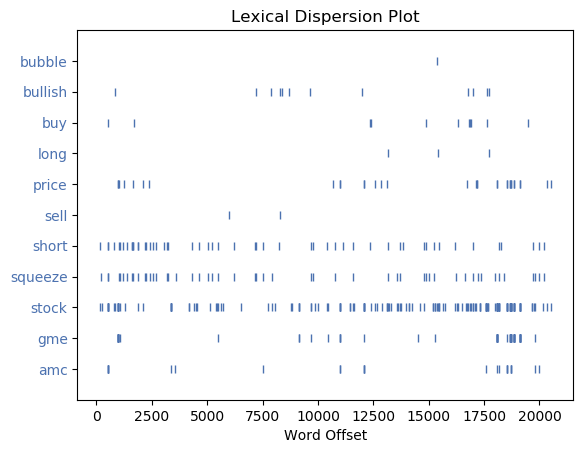

In [228]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
gmetext.dispersion_plot(['bubble', 'bullish', 'buy', 'long', 'price', 'sell', 'short', 'squeeze', 'stock', 'gme', 'amc'])
sns.set() #Re-enabling seaborn

In [128]:
def normalizeTokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized

In [129]:
d['normalized_tokens'] = d['tokenized_text'].apply(lambda x: normalizeTokens(x))

d['normalized_tokens_count'] = d['normalized_tokens'].apply(lambda x: len(x))

d.head()

,title,link,channel_name,channel_link,views,time_published,snippet,text,tokenized_text,word_counts,normalized_tokens,normalized_tokens_count
0,GME Stock Dumping Setting Up For Earnings Anno...,https://www.youtube.com/watch?v=QxAURd6O50g,Happy Money,https://www.youtube.com/c/HappyMoneyFinance,989 views,1 day ago,"Thank you for your support. Sub up, Like up, C...",GME Stock Dumping Setting Up For Earnings Anno...,"[GME, Stock, Dumping, Setting, Up, For, Earnin...",28,"[gme, stock, dumping, set, earning, announceme...",16
1,AMC Stock & GME Stock Hedge Funds And Big Bank...,https://www.youtube.com/watch?v=27pvUBtMCeQ,Simulate & Trade,https://www.youtube.com/channel/UCW6xUGOnJ_XOR...,9.8K views,23 hours ago,AMC Stock and GME Stock are the best hedge aga...,AMC Stock & GME Stock Hedge Funds And Big Bank...,"[AMC, Stock, GME, Stock, Hedge, Funds, And, Bi...",33,"[amc, stock, gme, stock, hedge, fund, big, ban...",24
2,GME Short Squeeze 3-11-22 | Fox News Highlight...,https://www.youtube.com/watch?v=KMOKJirlL-k,JacksonHunter,https://www.youtube.com/c/JacksonHunter,1.2K views,21 hours ago,"In this video we go over the chart, SPY, Black...",GME Short Squeeze 3-11-22 | Fox News Highlight...,"[GME, Short, Squeeze, 3, 11, 22, |, Fox, News,...",36,"[gme, short, squeeze, |, fox, news, highlight,...",23
3,SHOCKING: Jim Cramer TALKS AMC & GME (GameStop...,https://www.youtube.com/watch?v=FAs1vYKXGRc,TickrBox,https://www.youtube.com/c/TickrBox,5.2K views,7 days ago,SHOCKING: Jim Cramer TALKS AMC & GME (GameStop...,SHOCKING: Jim Cramer TALKS AMC & GME (GameStop...,"[SHOCKING, Jim, Cramer, TALKS, AMC, GME, GameS...",28,"[shocking, jim, cramer, talk, amc, gme, gamest...",24
4,BREAKING: Jordan Belfort (Wolf of Wall Street)...,https://www.youtube.com/watch?v=6rn2_EoDoXU,TickrBox,https://www.youtube.com/c/TickrBox,642 views,2 hours ago,Join the 100% Winner Community https://www.pat...,BREAKING: Jordan Belfort (Wolf of Wall Street)...,"[BREAKING, Jordan, Belfort, Wolf, of, Wall, St...",34,"[break, jordan, belfort, wolf, wall, street, t...",22


In [130]:
countedWords = wordCounter(d['normalized_tokens'].sum())

In [135]:
countedWords.sort_values('count', ascending=False, inplace=True)
countedWords[:20]

,word,count
1,stock,1538
0,gme,1066
15,amc,685
31,gamestop,368
34,|,211
27,market,191
42,$,188
32,short,181
33,squeeze,168
305,today,158


In [138]:
#.sum() adds together the lists from each row into a single list
gmedist = nltk.ConditionalFreqDist(((len(w), w) for w in d['normalized_tokens'].sum()))

#print the number of words
print(gmedist.N())

13239


In [140]:
gmedist[3] #words and frequency of length 3

FreqDist({'gme': 1066, 'amc': 685, 'new': 68, 'buy': 56, 'big': 38, 'sec': 33, 'get': 29, 'day': 27, 'run': 25, 'set': 24, ...})

From this we can lookup the distributions of different word lengths

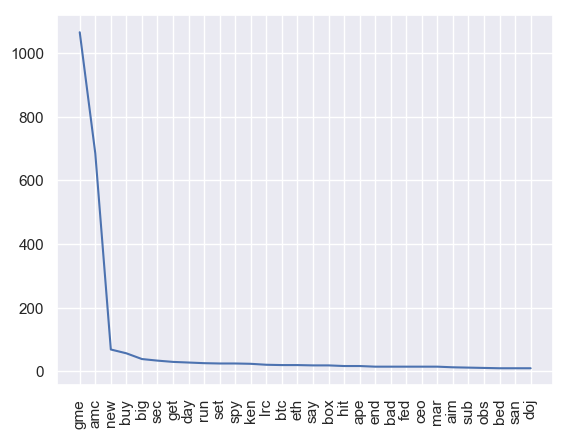

In [185]:
all_common = pd.DataFrame(gmedist[3].most_common(30))
plt.plot(all_common[0], all_common[1])
plt.xticks(rotation = 90)
plt.show();

In [152]:
def spacy_pos(word_list):
    tags = []
    doc = nlp(word_list.lower())
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags

In [154]:
d['normalized_tokens_POS'] = [spacy_pos(t) for t in d['text']]

This gives us a new column with the part of speech as a short initialism and the word in a tuple, exactly how the `nltk.ConditionalFreqDist()` function wants them. We can now construct another conditional frequency distribution.

In [155]:
gmefdist_WordtoPOS = nltk.ConditionalFreqDist(d['normalized_tokens_POS'].sum())
list(gmefdist_WordtoPOS.items())[:10] #(w.text, w.tag_) pairs

[('gme',
  FreqDist({'NNP': 710, 'NN': 341, 'VB': 7, 'FW': 5, 'JJ': 1, 'NNS': 1, 'VBP': 1})),
 ('stock', FreqDist({'NN': 905, 'NNP': 557})),
 ('dumping', FreqDist({'NN': 1})),
 ('setting', FreqDist({'VBG': 2})),
 ('up', FreqDist({'RP': 45, 'RB': 24, 'IN': 18})),
 ('for', FreqDist({'IN': 209})),
 ('earnings', FreqDist({'NNS': 21})),
 ('announcement?thank', FreqDist({'.': 1})),
 ('you', FreqDist({'PRP': 153})),
 ('your', FreqDist({'PRP$': 48}))]

This gives the frequency of each word as each part of speech...which can be uninformative and boring. What we want is the converse; the frequency of each part of speech for each word.

In [156]:
gmefdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in d['normalized_tokens_POS'].sum())

We can now identify and collect all of the superlative adjectives

In [158]:
gmefdist_POStoWord['JJ']

FreqDist({'short': 119, 'current': 101, 'poor': 95, 'gamestop': 73, 'new': 58, 'live': 55, 'amc': 47, 'bullish': 30, 'big': 29, 'free': 28, ...})

Or look at the most common nouns

In [165]:
gmefdist_POStoWord['NN'].most_common(10) #top 10 most common

[('stock', 905),
 ('gme', 341),
 ('gamestop', 198),
 ('market', 173),
 ('today', 156),
 ('video', 140),
 ('hedge', 122),
 ('squeeze', 112),
 ('#', 87),
 ('price', 79)]

Or plot the base form verbs against their number of occurrences

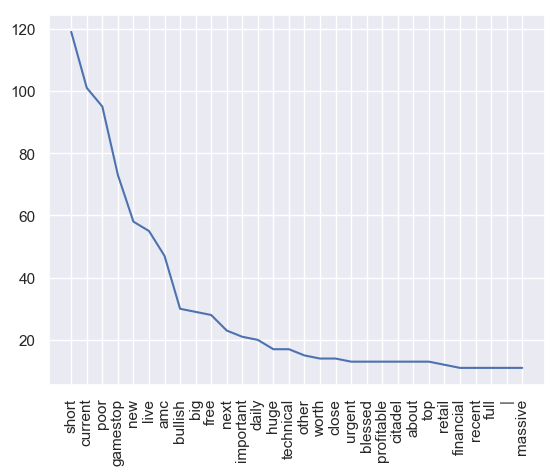

In [174]:
VB_common = pd.DataFrame(gmefdist_POStoWord['JJ'].most_common(30))
plt.plot(VB_common[0], VB_common[1])
plt.xticks(rotation = 90)
plt.show();

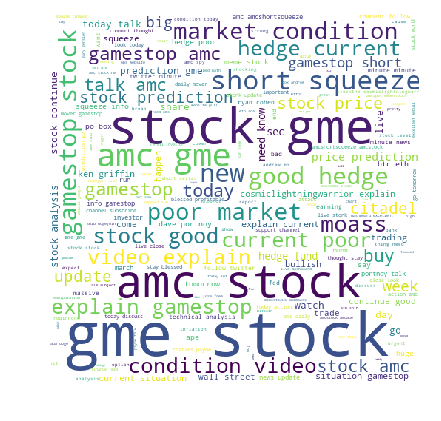

In [186]:
wc = wordcloud.WordCloud(background_color="white", max_words=200, 
                         width= 1000, height = 1000, 
                         mode ='RGBA', scale=.5).generate(' '.join(d['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("GME_word_cloud.pdf", format = 'pdf')

In [221]:
#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling

In [189]:
#initialize
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
#initialize
gmeTFVects = TFVectorizer.fit_transform(d['text'])

In [194]:
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(gmeTFVects.toarray())
reduced_data = pca.transform(gmeTFVects.toarray())

In [192]:
def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = plt.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = plt.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


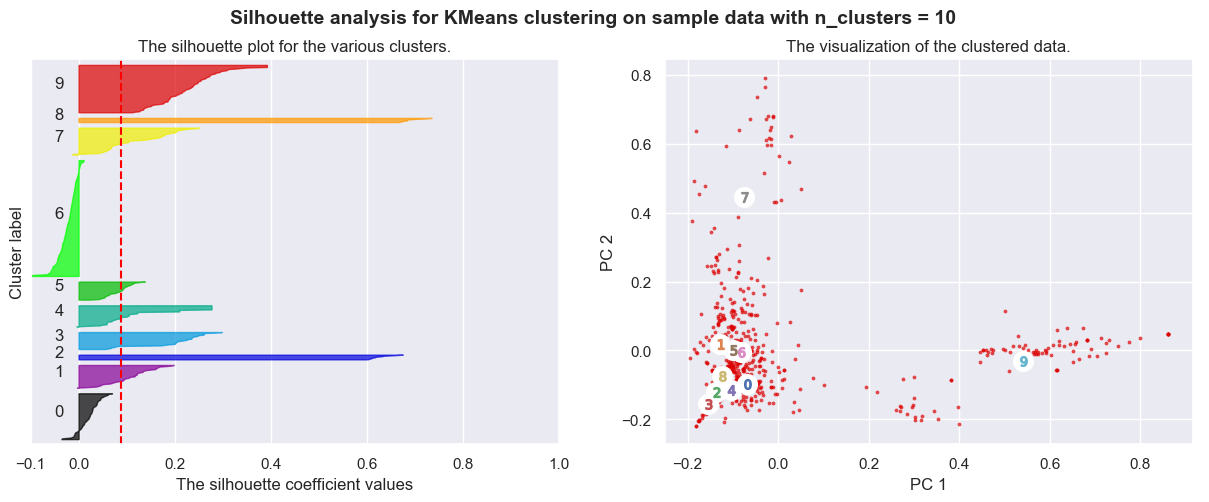

For n_clusters = 10, The average silhouette_score is : 0.089


In [206]:
X = gmeTFVects.toarray()
plotSilhouette(10, X)

In [211]:
%%time
km = sklearn.cluster.KMeans(n_clusters=10, init='k-means++')

km.fit(DescriptionTFVects)

d['10_kmeans_predictions'] = km.labels_

CPU times: user 813 ms, sys: 19.8 ms, total: 833 ms
Wall time: 846 ms


In [212]:
terms = ngTFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]#why
for i in range(10):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 best
 conditions
 poor
 current
 hedge
 explains
 video
 market
 gamestop
 bullish


Cluster 1:
 live
 like
 dashboard
 channel
 tomorrow
 subscribe
 blessed
 stay
 profitable
 predictions


Cluster 2:
 prediction
 price
 analysis
 gamestop
 march
 technical
 used
 join
 predictions
 going


Cluster 3:
 short
 squeeze
 gamestop
 cosmiclightningwarrior
 situation
 info
 current
 explains
 new
 2021


Cluster 4:
 po
 box
 level
 spy
 lrc
 san
 jose
 610545
 ca
 95161


Cluster 5:
 gamestop
 squeeze
 stocks
 short
 live
 com
 news
 moass
 time
 buy


Cluster 6:
 today
 wall
 continue
 moass
 street
 market
 talk
 hedge
 set
 need


Cluster 7:
 talks
 dave
 portnoy
 payne
 amcshortsqueeze
 shocking
 urgent
 charles
 amcstock
 amcapes


Cluster 8:
 gamestop
 week
 sec
 meme
 know
 video
 report
 let
 looking
 earnings


Cluster 9:
 minute
 twitter
 follow
 updates
 comment
 sub
 like
 news
 support
 happymoneyyt




In [209]:
%%time
km = sklearn.cluster.KMeans(n_clusters=4, init='k-means++')

km.fit(DescriptionTFVects)

d['4_kmeans_predictions'] = km.labels_

CPU times: user 780 ms, sys: 6.01 ms, total: 786 ms
Wall time: 809 ms


In [210]:
terms = ngTFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]#why
for i in range(4):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 short
 squeeze
 gamestop
 today
 moass
 stocks
 new
 live
 week
 citadel


Cluster 1:
 prediction
 gamestop
 price
 analysis
 going
 live
 predictions
 tomorrow
 march
 action


Cluster 2:
 like
 minute
 comment
 support
 twitter
 blessed
 profitable
 stay
 subscribe
 thoughts


Cluster 3:
 conditions
 best
 poor
 hedge
 market
 current
 explains
 video
 gamestop
 continue




In [217]:
d['tokenized_text'] = d['title'].apply(lambda x: lucem_illud.word_tokenize(x))
d['normalized_tokens'] = d['title'].apply(lambda x: lucem_illud.normalizeTokens(x))

In [218]:
d.head()

,title,link,channel_name,channel_link,views,time_published,snippet,text,tokenized_text,word_counts,normalized_tokens,normalized_tokens_count,normalized_tokens_POS,4_kmeans_predictions,10_kmeans_predictions
0,GME Stock Dumping Setting Up For Earnings Anno...,https://www.youtube.com/watch?v=QxAURd6O50g,Happy Money,https://www.youtube.com/c/HappyMoneyFinance,989 views,1 day ago,"Thank you for your support. Sub up, Like up, C...",GME Stock Dumping Setting Up For Earnings Anno...,"[GME, Stock, Dumping, Setting, Up, For, Earnin...",28,"[gme, stock, dump, set, earnings, announcement]",16,"[(gme, NNP), (stock, NNP), (dumping, NN), (set...",2,9
1,AMC Stock & GME Stock Hedge Funds And Big Bank...,https://www.youtube.com/watch?v=27pvUBtMCeQ,Simulate & Trade,https://www.youtube.com/channel/UCW6xUGOnJ_XOR...,9.8K views,23 hours ago,AMC Stock and GME Stock are the best hedge aga...,AMC Stock & GME Stock Hedge Funds And Big Bank...,"[AMC, Stock, GME, Stock, Hedge, Funds, And, Bi...",33,"[amc, stock, gme, stock, hedge, fund, big, ban...",24,"[(amc, NNP), (stock, NNP), (&, CC), (gme, NNP)...",3,0
2,GME Short Squeeze 3-11-22 | Fox News Highlight...,https://www.youtube.com/watch?v=KMOKJirlL-k,JacksonHunter,https://www.youtube.com/c/JacksonHunter,1.2K views,21 hours ago,"In this video we go over the chart, SPY, Black...",GME Short Squeeze 3-11-22 | Fox News Highlight...,"[GME, Short, Squeeze, 3, 11, 22, |, Fox, News,...",36,"[gme, short, squeeze, |, fox, news, highlight,...",23,"[(gme, NNP), (short, NNP), (squeeze, NNP), (3,...",0,5
3,SHOCKING: Jim Cramer TALKS AMC & GME (GameStop...,https://www.youtube.com/watch?v=FAs1vYKXGRc,TickrBox,https://www.youtube.com/c/TickrBox,5.2K views,7 days ago,SHOCKING: Jim Cramer TALKS AMC & GME (GameStop...,SHOCKING: Jim Cramer TALKS AMC & GME (GameStop...,"[SHOCKING, Jim, Cramer, TALKS, AMC, GME, GameS...",28,"[shock, jim, cramer, talk, amc, gme, gamestop,...",24,"[(shocking, NN), (:, :), (jim, NNP), (cramer, ...",0,7
4,BREAKING: Jordan Belfort (Wolf of Wall Street)...,https://www.youtube.com/watch?v=6rn2_EoDoXU,TickrBox,https://www.youtube.com/c/TickrBox,642 views,2 hours ago,Join the 100% Winner Community https://www.pat...,BREAKING: Jordan Belfort (Wolf of Wall Street)...,"[BREAKING, Jordan, Belfort, Wolf, of, Wall, St...",34,"[break, jordan, belfort, wolf, wall, street, t...",22,"[(breaking, NN), (:, :), (jordan, NNP), (belfo...",0,5


In [219]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

d['reduced_tokens'] = d['normalized_tokens'].apply(lambda x: dropMissing(x, TFVectorizer.vocabulary_.keys()))

In [222]:
dictionary = gensim.corpora.Dictionary(d['reduced_tokens'])
corpus = [dictionary.doc2bow(text) for text in d['reduced_tokens']]
gensim.corpora.MmCorpus.serialize('senate.mm', corpus)
senmm = gensim.corpora.MmCorpus('senate.mm')

In [224]:
%%time
newslda = gensim.models.ldamodel.LdaModel(corpus=senmm, id2word=dictionary, num_topics=10, alpha='auto', eta='auto')

CPU times: user 696 ms, sys: 8.46 ms, total: 704 ms
Wall time: 800 ms


In [225]:
topicsDict = {}
for topicNum in range(newslda.num_topics):
    topicWords = [w for w, p in newslda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pd.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,moass,today,market,gamestop,gamestop,buy,gamestop,short,short,gamestop
1,gamestop,news,citadel,short,live,gamestop,dashboard,squeeze,squeeze,squeeze
2,wall,meme,live,buy,need,live,analysis,gamestop,update,prediction
3,need,price,talk,talk,market,moass,squeeze,moass,gamestop,short
4,know,market,big,price,know,short,price,market,new,price
5,citadel,big,squeeze,squeeze,week,prediction,new,info,fund,analysis
6,squeeze,gamestop,hedge,live,update,analysis,live,new,hedge,earnings
7,news,sec,long,prediction,moass,shiba,high,update,moass,moass
8,street,tomorrow,prediction,moass,new,squeeze,moass,trade,need,buy
9,bullish,happen,price,know,stonk,update,short,need,portnoy,week


In [226]:
%%time
newslda = gensim.models.ldamodel.LdaModel(corpus=senmm, id2word=dictionary, num_topics=5, alpha='auto', eta='auto')

CPU times: user 1.09 s, sys: 43.2 ms, total: 1.14 s
Wall time: 1.32 s


In [227]:
topicsDict = {}
for topicNum in range(newslda.num_topics):
    topicWords = [w for w, p in newslda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pd.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
0,squeeze,gamestop,gamestop,gamestop,price
1,gamestop,need,short,need,prediction
2,short,big,squeeze,moass,market
3,update,know,prediction,know,gamestop
4,new,news,live,update,moass
5,moass,buy,analysis,market,analysis
6,live,moass,citadel,bullish,know
7,buy,bullish,trade,watch,inflation
8,info,important,talk,short,dip
9,market,right,moass,squeeze,live


In [256]:
d['tokenized_texts'] = d['tokenized_text'].apply(lambda x: [x])
d['normalized_texts'] = d['normalized_tokens'].apply(lambda x: [x])

In [257]:
#########WEEK 4
W2V = gensim.models.word2vec.Word2Vec(d['normalized_texts'].sum(), sg=0)

In [260]:
len(d['normalized_texts'].sum())

638

In [258]:
W2V.wv.vocab

{'gme': <gensim.models.keyedvectors.Vocab at 0x1330185c0>,
 'stock': <gensim.models.keyedvectors.Vocab at 0x133018780>,
 'set': <gensim.models.keyedvectors.Vocab at 0x134185ba8>,
 'earnings': <gensim.models.keyedvectors.Vocab at 0x133bd3898>,
 'amc': <gensim.models.keyedvectors.Vocab at 0x133bd3a90>,
 'hedge': <gensim.models.keyedvectors.Vocab at 0x133bd3a58>,
 'fund': <gensim.models.keyedvectors.Vocab at 0x133bd3fd0>,
 'big': <gensim.models.keyedvectors.Vocab at 0x133bd3908>,
 'bank': <gensim.models.keyedvectors.Vocab at 0x133bd38d0>,
 'get': <gensim.models.keyedvectors.Vocab at 0x133bd3940>,
 'catch': <gensim.models.keyedvectors.Vocab at 0x133bd3e10>,
 'short': <gensim.models.keyedvectors.Vocab at 0x133bd3828>,
 'squeeze': <gensim.models.keyedvectors.Vocab at 0x133bd3208>,
 '|': <gensim.models.keyedvectors.Vocab at 0x133bd37b8>,
 'news': <gensim.models.keyedvectors.Vocab at 0x133bd39e8>,
 'market': <gensim.models.keyedvectors.Vocab at 0x133bd3b70>,
 'shock': <gensim.models.keyedvecto

In [261]:
W2V.most_similar('gme')

[('stock', 0.9998062252998352),
 ('amc', 0.9997835159301758),
 ('$', 0.9997791051864624),
 ('|', 0.999762773513794),
 ('live', 0.9997110962867737),
 ('gamestop', 0.9996991157531738),
 ('bbby', 0.9996843934059143),
 ('moass', 0.9996776580810547),
 ('talk', 0.9996538162231445),
 ('short', 0.9996510744094849)]

In [263]:
W2V.most_similar('bullish')

[('btc', 0.99913090467453),
 ('gme', 0.999069333076477),
 ('$', 0.9990635514259338),
 ('|', 0.9990558624267578),
 ('stock', 0.9990365505218506),
 ('amc', 0.9990243911743164),
 ('🚀', 0.9990054368972778),
 ('live', 0.9990031123161316),
 ('mover', 0.998986542224884),
 ('squeeze', 0.9989818334579468)]

In [267]:
W2V.most_similar('citadel')

[('moass', 0.9996432065963745),
 ('stock', 0.9996041655540466),
 ('$', 0.9995770454406738),
 ('|', 0.9995646476745605),
 ('gme', 0.9995555877685547),
 ('gamestop', 0.9995529055595398),
 ('amc', 0.9995481371879578),
 ('btc', 0.9995073676109314),
 ('bbby', 0.9994943141937256),
 ('live', 0.9994703531265259)]

In [277]:
W2V.most_similar(positive=['gme', 'hedge'], negative = ['bank'])

[('market', 0.9973212480545044),
 ('crypto', 0.9971807599067688),
 ('stock', 0.9970856308937073),
 ('bbby', 0.9970109462738037),
 ('amc', 0.9969691038131714),
 ('|', 0.9969620704650879),
 ('live', 0.9968990087509155),
 ('🚀', 0.996881365776062),
 ('prediction', 0.9968746900558472),
 ('trade', 0.9968708753585815)]

In [279]:
numWords = 50
targetWords = W2V.wv.index2word[:numWords]

wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(W2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[-0.16062663, -0.23212145, -0.03260498, ...,  0.00136783,
         0.05346525,  0.4363671 ],
       [-0.14450172, -0.1987903 , -0.0330665 , ...,  0.00441647,
         0.04828367,  0.3799808 ],
       [-0.1383642 , -0.1980534 , -0.03278654, ..., -0.00123822,
         0.0450214 ,  0.37463954],
       ...,
       [-0.03762012, -0.0569005 , -0.00912174, ...,  0.00044975,
         0.01639073,  0.09617153],
       [-0.05218557, -0.07685625, -0.01216075, ...,  0.00297205,
         0.01716377,  0.14791018],
       [-0.08139051, -0.11066982, -0.01639156, ..., -0.0032721 ,
         0.02870957,  0.22088397]], dtype=float32)

In [282]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

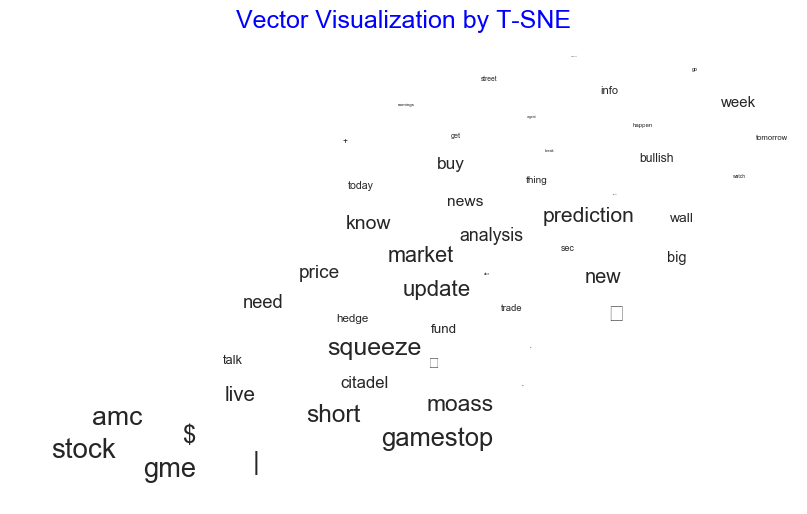

<Figure size 640x480 with 0 Axes>

In [288]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.title('Vector Visualization by T-SNE', size = 18, color = "blue")
plt.xticks(())
plt.yticks(())
plt.show()
plt.savefig('w2v_tsne.jpg')

In [284]:
pcaWords1 = sklearn.decomposition.PCA(n_components = 2).fit(wordsSubMatrix)
reducedPCA_data1 = pcaWords1.transform(wordsSubMatrix)

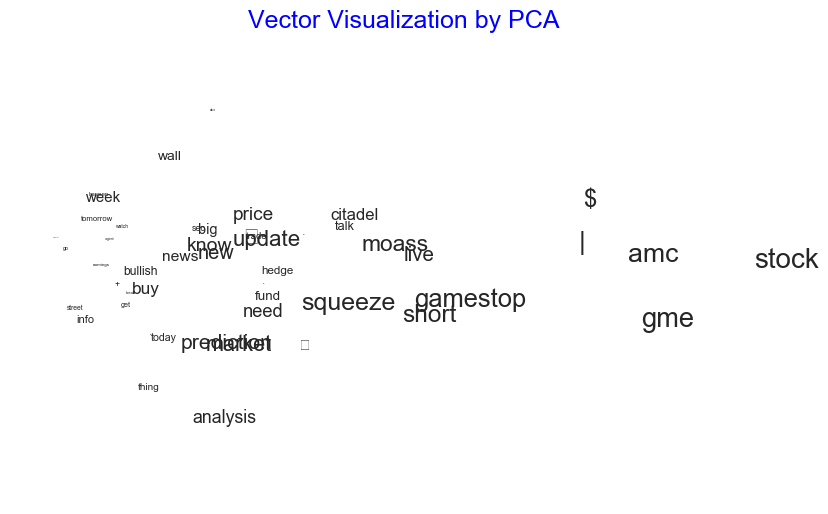

<Figure size 640x480 with 0 Axes>

In [289]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reducedPCA_data1[:, 0], reducedPCA_data1[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (reducedPCA_data1[:, 0][i],reducedPCA_data1[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.title('Vector Visualization by PCA', size = 18, color = "blue")
plt.xticks(())
plt.yticks(())
plt.show()
plt.savefig('w2v_pca.jpg')